# Projet Supply Chain - DS23

Notre projet porte sur l'analyse d'une supply chain et donc l'ensemble des étapes d'approvisionnement, du processus productif 
et de distribution de la marchandise.

En aval de ce processus, il peut être intéressant d'évaluer la satisfaction client : 
- les produits correspondent ils à leurs besoins ?
- si non : quels sont les motifs d'insatisfactions ?
- en cas d'insatisfaction, des retours leurs sont ils faits ? sous combien de temps ?
- le secteur d'achat a t'il un impact dans le type d'avis reçu ?

Dans le cadre de notre analyse, nous allons étudier différentes données issues de scrapping de différents sites internet d'entreprises de secteurs d'activité différentes :
- cosmétique
- agro alimentaire
- vestimentaire
- milieu du sport
En fonction des données récupérées et de leur analyse, nous orienterons notre projet vers un domaine spécifique.


## 1. Rapport d'exploration, de data visualisation et de pre-processing des données

### 1.1 Collecte des données

In [25]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

#### a) Jeu de données scrappé sur le site Trustpilot - company Uniqlo

In [26]:
from bs4 import BeautifulSoup as bs
import requests

In [27]:
url_uniqlo='https://fr.trustpilot.com/review/www.uniqlo.com'
company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 19): 
    url_uni=f"{url_uniqlo}?page={page_number}"
    page_uni=requests.get(url_uni, verify=False)
    soup_uniqlo=bs(page_uni.content, 'lxml')

    for donnees in soup_uniqlo.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :
      
        company.append('Uniqlo')
        
        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne) 
        
        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)
                
        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:]) 
        
        #etoile=donnees.find('img') renvoie, à tort, des notes vides ne pouvant pas être converties en 'int'
        #notes.append(etoile['alt'])
        #nous utilisons alors le code suivant:
        
        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src'])        
          
        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)
              
        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)
        
    
        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])
        
        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append("NaN")
        else:
            reponse_sav.append(rep_sav.getText())
           
        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append('NaN')
    
print(company)
print(client)
print(nb_avis_client)
print(date_commande)
print(notes)
print(titre_commentaire)
print(commentaire)#trop de balise
print(date_commentaire)
print(reponse_sav)
print(date_reponse_sav)



C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedoc

['Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo', 'Uniqlo',

In [28]:
import pandas as pd

df_uniqlo = pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_uniqlo['notes'] = df_uniqlo['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_uniqlo['notes'] = df_uniqlo['notes'].str.replace('.svg', '')

display(df_uniqlo.head())


,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Uniqlo,ELLE,1 avis,29 juin 2023,1,Expérience déplorable au magasin Uniqlo de Passy,Nous sommes allées dans le magasin Uniqlo de P...,2023-06-29T17:03:58.000Z,NaN,NaN
1,Uniqlo,PtitMad'Abdullah PtitMad'Abdullah,3 avis,03 juillet 2023,1,Uniqlo et Stuart non reçu et non remboursabler,"Madame, Monsieur,Je vous informe que suite à m...",2023-07-07T12:41:03.000Z,NaN,NaN
2,Uniqlo,Chabada,3 avis,05 juillet 2023,1,Pulls boulochent et SAV nul,Très mauvaise expérience avec les pulls en lai...,2023-07-05T12:10:29.000Z,NaN,NaN
3,Uniqlo,Elodie,12 avis,18 juillet 2023,5,Très bon magasin avec une présentation des vêt...,Date de l'expérience: 18 juillet 2023,2023-07-18T11:10:50.000Z,NaN,NaN
4,Uniqlo,Antoine,1 avis,21 juin 2023,1,Article jamais reçu,"Article jamais reçu, cela fait plus de 15 jour...",2023-06-21T10:19:09.000Z,NaN,NaN


#### b) Jeu de données scrappé sur le site Trustpilot - company Spartoo.com

In [29]:
url_spartoo='https://fr.trustpilot.com/review/www.spartoo.com'
company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 20): 
    url_uni=f"{url_spartoo}?page={page_number}"
    page_spartoo=requests.get(url_spartoo, verify=False)
    soup_spartoo=bs(page_spartoo.content, 'lxml')

    for donnees in soup_spartoo.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :
      
        company.append('Spartoo')
        
        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne)  
        
        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)
                
        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:]) 
        
        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src']) 
          
        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)
              
        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)
        
    
        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])
        
        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append("NaN")
        else:
            reponse_sav.append(rep_sav.getText())
           
        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append('NaN')
            

print(company)
print(client)
print(nb_avis_client)
print(date_commande)
print(notes)
print(titre_commentaire)
print(commentaire)#trop de balise
print(date_commentaire)
print(reponse_sav)
print(date_reponse_sav)

C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedoc

['Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo', 'Spartoo'

C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [30]:
df_spartoo = pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_spartoo['notes'] = df_spartoo['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_spartoo['notes'] = df_spartoo['notes'].str.replace('.svg', '')

display(df_spartoo.head())


,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Spartoo,Metelus Lunie,1 avis,13 juillet 2023,5,Bonne expérience,Avant j'avais des doutes car vu le nombre de ...,2023-07-18T13:01:05.000Z,NaN,NaN
1,Spartoo,Client,4 avis,10 juillet 2023,3,Livaraison compliqué choix de relais non respecté,Je ne comprends pas pourquoi la commande de 2 ...,2023-07-18T11:19:51.000Z,NaN,NaN
2,Spartoo,Annitabis,30 avis,17 juillet 2023,5,Envoi et retour avec remboursement…,Envoi et retour avec remboursement super rapid...,2023-07-18T15:11:37.000Z,NaN,NaN
3,Spartoo,Madame Delphine,9 avis,18 juillet 2023,3,Les produits Spartoo sont livrés en…,Les produits Spartoo sont livrés en temps et e...,2023-07-18T11:05:30.000Z,NaN,NaN
4,Spartoo,HASSAIN,1 avis,10 juillet 2023,4,"Site sérieux, choix, prix, suivi de commande a...","Site sérieux, livraison dans les délais annonc...",2023-07-16T12:01:01.000Z,NaN,NaN


#### c) Jeu de données scrappé sur le site Trustpilot - company Vinted

In [31]:
url_vinted='https://fr.trustpilot.com/review/vinted.fr'
company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 50): 
    url_vinted=f"{url_vinted}?page={page_number}"
    page_vinted=requests.get(url_vinted, verify=False)
    soup_vinted=bs(page_vinted.content, 'lxml')
    
    for donnees in soup_vinted.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :
      
        company.append('Vinted')
        
        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne) 
        
        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)
                
        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:]) 
        
        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src']) 
          
        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)
              
        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)
        
    
        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])
        
        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append("NaN")
        else:
            reponse_sav.append(rep_sav.getText())
           
        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append('NaN')
    
print(company)
print(client)
print(nb_avis_client)
print(date_commande)
print(notes)
print(titre_commentaire)
print(commentaire)#trop de balise
print(date_commentaire)
print(reponse_sav)
print(date_reponse_sav)

C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedoc

C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedoc

C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


['Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted', 'Vinted']
['Thierry SERRA', 'Catherine Flament', 'Badretaj', 'Stéphane Fromentin', 'Sophie Cayet', 'Sophie', 'Liza Zaza', 'Nadir Coskun', 'Pauline clin', 'Virginie Chupin', 'Ferrodonna', 'SNEYERS Dominique', 'Justine Carlu', 'Ahmed Saaid', 'Iness Mulomba-Mutombo', 'Philippe', 'Naiiade', 'Cyrill Torres', 'Blow', 'BULLY']
['1 avis', '2 avis', '1 avis', '2 avis', '1 avis', '20 avis', '1 avis', '1 avis', '4 avis', '1 avis', '1 avis', '2 avis', '8 avis', '1 avis', '1 avis', '9 avis', '2 avis', '13 avis', '2 avis', '2 avis']
['17 juillet 2023', '13 juillet 2023', '18 juillet 2023', '18 juillet 2023', '18 juillet 2023', '17 juillet 2023', '18 juillet 2023', '13 juillet 2023', '17 juillet 2023', '16 juillet 2023', '14 juillet 2023', '16 juillet 2023', '18 juillet 2023', '10 juillet 2023', '20 février 2023'

C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [32]:
df_vinted = pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_vinted['notes'] = df_vinted['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_vinted['notes'] = df_vinted['notes'].str.replace('.svg', '')

display(df_vinted.head())
df_vinted.info()


,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Vinted,Thierry SERRA,1 avis,17 juillet 2023,4,Absence de QR Code pour envoyer sans imprimer,"Bonjour, en tant que vendeuse, j'aurai bien ai...",2023-07-17T18:51:41.000Z,NaN,NaN
1,Vinted,Catherine Flament,2 avis,13 juillet 2023,5,Échange sincère et sympathique avec la…,Échange sincère et sympathique avec la personn...,2023-07-17T07:46:55.000Z,NaN,NaN
2,Vinted,Badretaj,1 avis,18 juillet 2023,5,C'est ma première expérience,"C'est ma première expérience , j'avais un peti...",2023-07-18T17:42:44.000Z,NaN,NaN
3,Vinted,Stéphane Fromentin,2 avis,18 juillet 2023,5,excellent site de vente ou d'achat,excellent site de vente ou d'achat. La protect...,2023-07-18T15:35:21.000Z,NaN,NaN
4,Vinted,Sophie Cayet,1 avis,18 juillet 2023,5,une seconde vie,Donner une seconde vie aux vêtements et objets...,2023-07-18T15:58:25.000Z,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   company            20 non-null     object
 1   client             20 non-null     object
 2   nb_avis_client     20 non-null     object
 3   date_commande      20 non-null     object
 4   notes              20 non-null     object
 5   titre_commentaire  20 non-null     object
 6   commentaire        20 non-null     object
 7   date_commentaire   20 non-null     object
 8   reponse_sav        20 non-null     object
 9   date_reponse_sav   20 non-null     object
dtypes: object(10)
memory usage: 1.7+ KB


#### d) Jeu de données scrappé sur le site Trustpilot - company La Boutique Officielle

In [33]:
url_boutique='https://fr.trustpilot.com/review/laboutiqueofficielle.com'
company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []

for page_number in range(1, 25): 
    url_boutique=f"{url_boutique}?page={page_number}"
    page_boutique=requests.get(url_boutique, verify=False)
    soup_boutique=bs(page_boutique.content, 'lxml')

    for donnees in soup_boutique.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :
      
        company.append('La Boutique Officielle')
        
        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne) 
        
        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)
                
        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:]) 
        
        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src']) 
          
        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)
              
        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)
        
    
        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])
        
        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append("NaN")
        else:
            reponse_sav.append(rep_sav.getText())
           
        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append('NaN')
    
print(company)
print(client)
print(nb_avis_client)
print(date_commande)
print(notes)
print(titre_commentaire)
print(commentaire)#trop de balise
print(date_commentaire)
print(reponse_sav)
print(date_reponse_sav)

C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedoc

['La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle', 'La Boutique Officielle']
['Salif Sissoko Dansoko', 'CHRISTOPHE DUFOSSé', 'celian thorel', 'Hannier', 'JEAN PASCAL GERMAIN LEULIET', 'Carretero david', 'LAGEAT VERONIQUE', 'noetoiles', 'jean xavier', 'ODILE THIBAUD', 'Maryse Dogny', 'Client', 'juju es', 'Micky', 'Faÿ Alexandre', 'Audrey Knockaert', 'GUY Philippe', 'ludivine rave', 'GENEST Marie-christine', 'MIHAI']
['3 avis', '3 avis', '1 avis', '1 avis', '1 avis', '1 avis', '25 avis', '3 avis', '3 avis', '1 avis', '1 avis', '16 avis', '1 avis', '1 a

In [34]:
df_boutique_officielle = pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_boutique_officielle['notes'] = df_boutique_officielle['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_boutique_officielle['notes'] = df_boutique_officielle['notes'].str.replace('.svg', '')

display(df_boutique_officielle.head())
df_boutique_officielle.info()

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,La Boutique Officielle,Salif Sissoko Dansoko,3 avis,17 juillet 2023,5,Quand on a besoin des meilleures choses…,Quand on a besoin des meilleures choses c'est ...,2023-07-17T23:55:07.000Z,NaN,NaN
1,La Boutique Officielle,CHRISTOPHE DUFOSSé,3 avis,16 juillet 2023,5,Toujours satisfait,Toujours satisfait lors de mes commandes. Choi...,2023-07-16T20:16:05.000Z,NaN,NaN
2,La Boutique Officielle,celian thorel,1 avis,18 juillet 2023,1,Chaussure,BonjourA fuir j'ai reçu une paire de chaussure...,2023-07-18T16:19:41.000Z,NaN,NaN
3,La Boutique Officielle,Hannier,1 avis,10 juillet 2023,5,Content et satisfait,Les articles sont de vrai qualité et vraiment ...,2023-07-16T12:51:46.000Z,NaN,NaN
4,La Boutique Officielle,JEAN PASCAL GERMAIN LEULIET,1 avis,12 juillet 2023,5,Un site simple à utiliser avec beaucoup…,Un site simple à utiliser avec beaucoup de cho...,2023-07-17T19:18:03.000Z,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   company            20 non-null     object
 1   client             20 non-null     object
 2   nb_avis_client     20 non-null     object
 3   date_commande      20 non-null     object
 4   notes              20 non-null     object
 5   titre_commentaire  20 non-null     object
 6   commentaire        20 non-null     object
 7   date_commentaire   20 non-null     object
 8   reponse_sav        20 non-null     object
 9   date_reponse_sav   20 non-null     object
dtypes: object(10)
memory usage: 1.7+ KB


#### e) Fusion des dataframes 

In [35]:
df_vetements=pd.concat([df_uniqlo, df_spartoo, df_vinted, df_boutique_officielle], ignore_index=True)

df_vetements.head()

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Uniqlo,ELLE,1 avis,29 juin 2023,1,Expérience déplorable au magasin Uniqlo de Passy,Nous sommes allées dans le magasin Uniqlo de P...,2023-06-29T17:03:58.000Z,NaN,NaN
1,Uniqlo,PtitMad'Abdullah PtitMad'Abdullah,3 avis,03 juillet 2023,1,Uniqlo et Stuart non reçu et non remboursabler,"Madame, Monsieur,Je vous informe que suite à m...",2023-07-07T12:41:03.000Z,NaN,NaN
2,Uniqlo,Chabada,3 avis,05 juillet 2023,1,Pulls boulochent et SAV nul,Très mauvaise expérience avec les pulls en lai...,2023-07-05T12:10:29.000Z,NaN,NaN
3,Uniqlo,Elodie,12 avis,18 juillet 2023,5,Très bon magasin avec une présentation des vêt...,Date de l'expérience: 18 juillet 2023,2023-07-18T11:10:50.000Z,NaN,NaN
4,Uniqlo,Antoine,1 avis,21 juin 2023,1,Article jamais reçu,"Article jamais reçu, cela fait plus de 15 jour...",2023-06-21T10:19:09.000Z,NaN,NaN


In [36]:
df_vetements['company'].value_counts() # ne renvoie que les 1ere pages de vinted et la boutique officielle

company
Spartoo                   380
Uniqlo                    360
Vinted                     20
La Boutique Officielle     20
Name: count, dtype: int64

### 1.2 Exploration des données

Analyse des variables

Le dataframe réalisé est composé des variables suivantes :
- company : l'entreprise dans laquelle les clients ont achété leurs produits
- client : nom / pseudo du client ayant acheté dans la company
- nb_avis_client : nombre d'avis du client émis sur la plateforme d'avis Trustpilot
- date_commande : date de l'expérience d'achat
- notes : nombre d'étoiles mis par le client pour son achat
- titre_commentaire : mot clef résumant le commentaire
- commentaire : commentaire du client détaillant son achat
- date_commentaire : date à laquelle le commentaire a été écrit sur le site (Trustpilot)
- reponse_sav : date à laquelle le service SAV a répondu au commentaire du client (en cas d'absence de retour : NaN)
- annee_commande : année de l'expérience d'achat du client

Analyse du type des variables

In [37]:
print(df_vetements.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   company            780 non-null    object
 1   client             780 non-null    object
 2   nb_avis_client     780 non-null    object
 3   date_commande      780 non-null    object
 4   notes              780 non-null    object
 5   titre_commentaire  780 non-null    object
 6   commentaire        780 non-null    object
 7   date_commentaire   780 non-null    object
 8   reponse_sav        780 non-null    object
 9   date_reponse_sav   780 non-null    object
dtypes: object(10)
memory usage: 61.1+ KB
None


L'analyse des variables va nous amener à :
- transformer les variables 'nb avis client' et 'notes' en nombre entier et changer leurs types en 'int' afin que l'on puisse exploiter ces variables
- changer le type des variables date_commentaire, date_reponse_sav en datetime afin de pouvoir exploiter les périodes associées
- nous pourrons alors calculer la différence entre la date du commentaire client et le retour du SAV

Nous extraierons également l'année de commande afin de pouvoir suivre l'évolution des notes en fonction du temps.

In [38]:
# transformation du type de la note
df_vetements['notes']=df_vetements['notes'].astype('int')

In [39]:
# transformation du nombre d'avis par client en nombre puis de son type en 'int'
df_vetements['nb_avis_client'] = df_vetements['nb_avis_client'].str.replace(' avis', '')
df_vetements['nb_avis_client']=df_vetements['nb_avis_client'].astype('int')

In [40]:

# ajout d'une colonne dans le dataframe afin de pouvoir suivre une évolution 
df_vetements["annee_commande"] = df_vetements['date_commande'].str.extract(r'(\d{4})')
df_vetements['annee_commande'] = df_vetements['annee_commande'].astype(int)
df_vetements.head()


,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav,annee_commande
0,Uniqlo,ELLE,1,29 juin 2023,1,Expérience déplorable au magasin Uniqlo de Passy,Nous sommes allées dans le magasin Uniqlo de P...,2023-06-29T17:03:58.000Z,NaN,NaN,2023
1,Uniqlo,PtitMad'Abdullah PtitMad'Abdullah,3,03 juillet 2023,1,Uniqlo et Stuart non reçu et non remboursabler,"Madame, Monsieur,Je vous informe que suite à m...",2023-07-07T12:41:03.000Z,NaN,NaN,2023
2,Uniqlo,Chabada,3,05 juillet 2023,1,Pulls boulochent et SAV nul,Très mauvaise expérience avec les pulls en lai...,2023-07-05T12:10:29.000Z,NaN,NaN,2023
3,Uniqlo,Elodie,12,18 juillet 2023,5,Très bon magasin avec une présentation des vêt...,Date de l'expérience: 18 juillet 2023,2023-07-18T11:10:50.000Z,NaN,NaN,2023
4,Uniqlo,Antoine,1,21 juin 2023,1,Article jamais reçu,"Article jamais reçu, cela fait plus de 15 jour...",2023-06-21T10:19:09.000Z,NaN,NaN,2023


In [41]:
# changement du format des dates de commande et de leurs types en datetime

from datetime import datetime
import locale
locale.setlocale(locale.LC_TIME, 'fr_FR')

def changement_date(date_cde):
    nlle_date = datetime.strptime(date_cde, '%d %B %Y')
    return nlle_date.strftime('%Y-%m-%d')

df_vetements['date_commande'] = df_vetements['date_commande'].apply(changement_date)

In [42]:
# changement du format des dates de commentaires et de leurs types en datetime

def changement_date2(date_comm):
    nlle_date = datetime.strptime(date_comm, '%Y-%m-%dT%H:%M:%S.%fZ')
    return nlle_date.strftime('%Y-%m-%d')

df_vetements['date_commentaire'] = df_vetements['date_commentaire'].apply(changement_date2)

In [43]:
# on force le changement de type de date_commentaire
df_vetements['date_commentaire'] = pd.to_datetime(df_vetements['date_commentaire'])

In [44]:
# on force le changement de type de date_reponse_sav
df_vetements['date_reponse_sav'] = pd.to_datetime(df_vetements['date_reponse_sav'])

In [45]:
df_vetements.head()

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav,annee_commande
0,Uniqlo,ELLE,1,2023-06-29,1,Expérience déplorable au magasin Uniqlo de Passy,Nous sommes allées dans le magasin Uniqlo de P...,2023-06-29,NaN,NaT,2023
1,Uniqlo,PtitMad'Abdullah PtitMad'Abdullah,3,2023-07-03,1,Uniqlo et Stuart non reçu et non remboursabler,"Madame, Monsieur,Je vous informe que suite à m...",2023-07-07,NaN,NaT,2023
2,Uniqlo,Chabada,3,2023-07-05,1,Pulls boulochent et SAV nul,Très mauvaise expérience avec les pulls en lai...,2023-07-05,NaN,NaT,2023
3,Uniqlo,Elodie,12,2023-07-18,5,Très bon magasin avec une présentation des vêt...,Date de l'expérience: 18 juillet 2023,2023-07-18,NaN,NaT,2023
4,Uniqlo,Antoine,1,2023-06-21,1,Article jamais reçu,"Article jamais reçu, cela fait plus de 15 jour...",2023-06-21,NaN,NaT,2023


In [46]:
# on vérifie que toutes les modifications aient bien été appliquées
df_vetements.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   company            780 non-null    object             
 1   client             780 non-null    object             
 2   nb_avis_client     780 non-null    int32              
 3   date_commande      780 non-null    object             
 4   notes              780 non-null    int32              
 5   titre_commentaire  780 non-null    object             
 6   commentaire        780 non-null    object             
 7   date_commentaire   780 non-null    datetime64[ns]     
 8   reponse_sav        780 non-null    object             
 9   date_reponse_sav   77 non-null     datetime64[ns, UTC]
 10  annee_commande     780 non-null    int32              
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int32(3), object(6)
memory usage: 58.0+ KB


In [47]:
# on regarde le nombre de valeurs manquantes par colonnes
df_vetements.isna().sum(axis = 0) 

# le texte 'NaN' n'est pas détecté comme nul dans la colonne 'reponse_sav' - changer en np.nan
# en dehors de la variable 'date_reponse_sav', aucune variable pouvant remettre en cause l'analyse de nos données 
# ne semble manquante. Nous n'avons donc pas de modification / suppression à effectuer

company                0
client                 0
nb_avis_client         0
date_commande          0
notes                  0
titre_commentaire      0
commentaire            0
date_commentaire       0
reponse_sav            0
date_reponse_sav     703
annee_commande         0
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


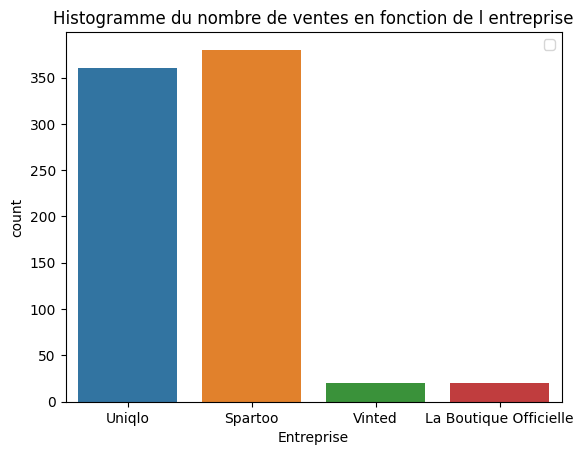

In [48]:
# Analyse de la distribution des ventes par entreprises

sns.countplot(x="company", data=df_vetements);
plt.xlabel('Entreprise')
plt.legend()
plt.title('Histogramme du nombre de ventes en fonction de l entreprise');

# ce graphique nous permet de voir que nous avons, dans notre df, beaucoup plus de données de spartoo et uniqlo que vinted 
# ou La Boutique Officielle. cela semble bizarre car nous avons le même nombre de page de chacune des entreprises et chacune
# des pages comportent 20 avis.
# en cas d'effectifs déséquilibrés, nous devons faire une normalisation. autre scrapping à faire ?

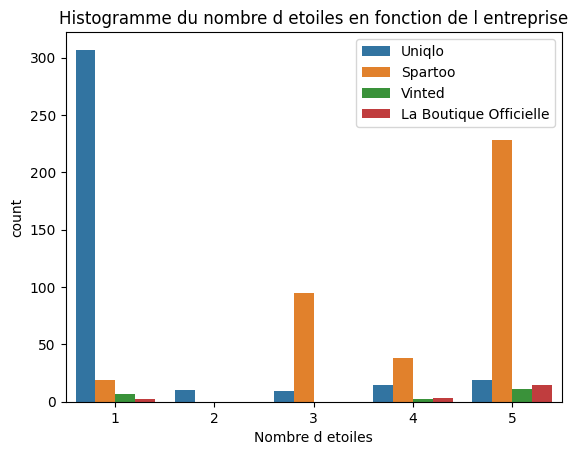

In [49]:
# Analyse de la distribution du nombre d'étoiles par entreprises

sns.countplot(x="notes", hue='company', data=df_vetements)
plt.xlabel('Nombre d etoiles')
plt.legend()
plt.title('Histogramme du nombre d etoiles en fonction de l entreprise');

# les données n'étant pas équilibrées (cf.code ci dessus), nous peinons à voir la distribution des notes de vinted et
# de la Boutique Officielle

In [50]:
print("Le pourcentage de répartition des étoiles est de : ", df_vetements["notes"].value_counts(normalize = True)*100)

# Nous constatons ainsi que les gens sont extrêmes dans leurs évaluations :
# ils déposent soit un très mauvais, soit un excellent commentaire

Le pourcentage de répartition des étoiles est de :  notes
1    42.948718
5    35.000000
3    13.333333
4     7.435897
2     1.282051
Name: proportion, dtype: float64


In [51]:
# Visualisation des 20 clients déposant le plus de commentaires 

top_20 = df_vetements.nlargest(20, 'nb_avis_client')
print(top_20[['company', 'client', 'nb_avis_client', 'notes']])

# on remarque qu'une cliente est particulièrement active sur Trustpilot
# la colonne 'nb_avis_client' ne semble pas pertinente. en effet, si une cliente faite de nombreux achats sur un meme site 
# et note chacune de ses commandes, alors elle apparait plusieurs fois "ex: Ondine ci dessous"
# une somme est à faire sur le nom du client (si celui ci ne change pas d'une commande à l'autre)

                    company          client  nb_avis_client  notes
86                   Uniqlo           Sarah             147      2
356                  Uniqlo          Thomas              70      1
192                  Uniqlo               g              41      1
321                  Uniqlo  Client Valerie              41      1
331                  Uniqlo        Mocoloco              41      1
225                  Uniqlo   Arquenso42340              34      4
774  La Boutique Officielle   Faÿ Alexandre              31      5
205                  Uniqlo            Fred              30      3
362                 Spartoo       Annitabis              30      5
382                 Spartoo       Annitabis              30      5
402                 Spartoo       Annitabis              30      5
422                 Spartoo       Annitabis              30      5
442                 Spartoo       Annitabis              30      5
462                 Spartoo       Annitabis              30   

In [1]:
""" BROUILLON

note_moyenne_par_client = df_vetements.groupby('client')['notes'].mean().nlargest(20)

note_moyenne_par_client.plot(kind='barh')

plt.xlabel('Note moyenne')
plt.ylabel('Clients')
plt.title('Note moyenne des 20 clients émettant le plus d\'avis')

plt.show()

# graphique différent des données ci dessus car nous sélectionner les meilleurs notes

"""

" BROUILLON\n\nnote_moyenne_par_client = df_vetements.groupby('client')['notes'].mean().nlargest(20)\n\nnote_moyenne_par_client.plot(kind='barh')\n\nplt.xlabel('Note moyenne')\nplt.ylabel('Clients')\nplt.title('Note moyenne des 20 clients émettant le plus d'avis')\n\nplt.show()\n\n# graphique différent des données ci dessus car nous sélectionner les meilleurs notes\n\n"

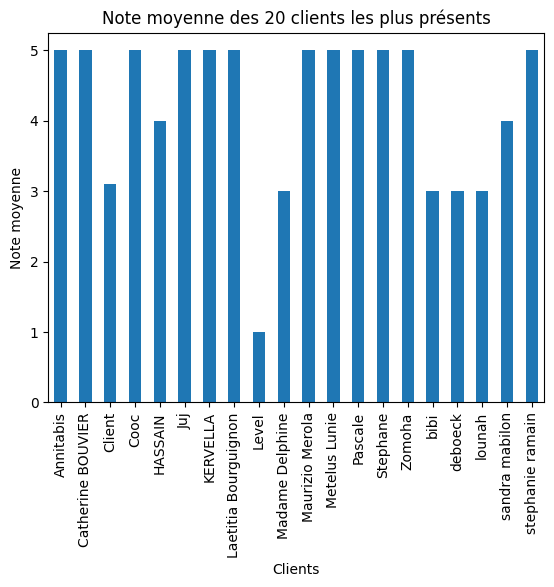

In [52]:
top_clients = df_vetements['client'].value_counts().nlargest(20)
top_clients_df = df_vetements[df_vetements['client'].isin(top_clients.index)]

moyenne_notes_top_clients = top_clients_df.groupby('client')['notes'].mean()

moyenne_notes_top_clients.plot(kind='bar')

plt.xlabel('Clients')
plt.ylabel('Note moyenne')
plt.title('Note moyenne des 20 clients les plus présents')

plt.show()


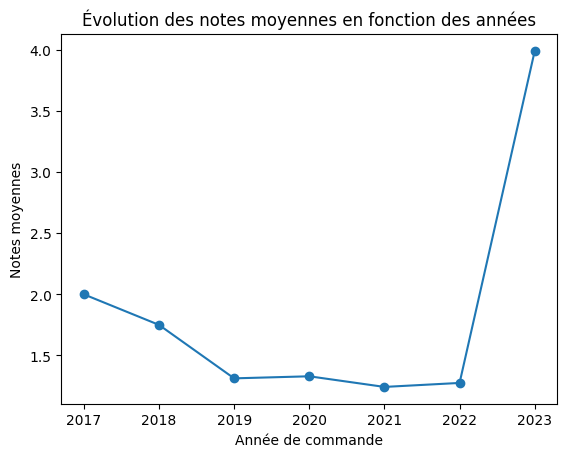

In [53]:
# évolution de la moyenne d'étoiles par an

moyennes_notes = df_vetements.groupby('annee_commande')['notes'].mean()

plt.plot(moyennes_notes.index, moyennes_notes.values, marker='o')
plt.xlabel('Année de commande')
plt.ylabel('Notes moyennes')
plt.title('Évolution des notes moyennes en fonction des années')
plt.show()


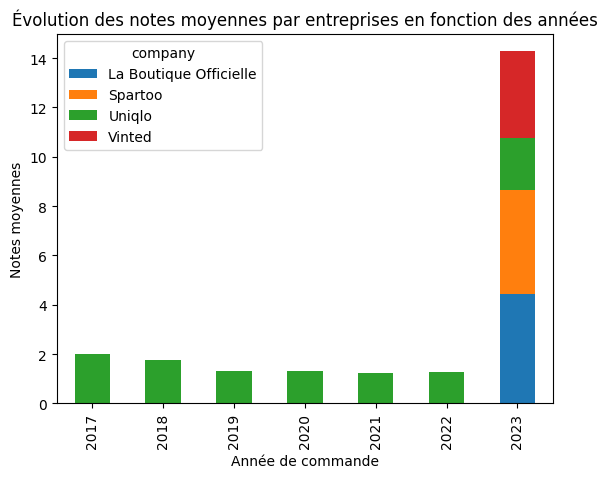

In [54]:
# évolution de la moyenne d'étoiles par entreprises, par an

moyennes_notes = df_vetements.groupby(['annee_commande', 'company'])['notes'].mean().unstack()

moyennes_notes.plot(kind='bar', stacked=True)

plt.xlabel('Année de commande')
plt.ylabel('Notes moyennes')
plt.title('Évolution des notes moyennes par entreprises en fonction des années')

plt.show()


### 1.3 Text mining

Nous allons maintenant essayer de déterminer le sentiment général qui se dégage des commentaires. 

In [64]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [57]:
# Initialiser la variable des mots vides
stop_words = set(stopwords.words('french'))
print(stop_words)

{'eus', 'ne', 'étées', 'étante', 'fusses', 'tes', 'ses', 'eussent', 'êtes', 'mais', 'votre', 'fusse', 'm', 'eues', 'la', 'il', 'eusse', 'étés', 'un', 'aviez', 'toi', 'se', 'au', 'aux', 'nous', 'à', 'aurait', 'soient', 'dans', 'été', 'ait', 'c', 'eue', 'eurent', 'sont', 'suis', 'étantes', 'moi', 'auriez', 'serait', 'te', 'même', 'que', 'ayante', 'qu', 'ont', 'les', 'étais', 'auront', 'de', 'avec', 'ou', 'aie', 'tu', 'ayant', 'leur', 'par', 'en', 'et', 'me', 'serions', 'avez', 'eusses', 'fussiez', 'notre', 'ta', 'n', 'serais', 'étant', 'seraient', 'avaient', 's', 'eût', 'avait', 'seriez', 'fus', 'aura', 'ton', 'aurions', 'le', 'aies', 'vos', 'seras', 't', 'avais', 'étants', 'eu', 'ai', 'eut', 'nos', 'sera', 'serai', 'l', 'ces', 'aurais', 'es', 'sois', 'sur', 'serez', 'avons', 'des', 'y', 'lui', 'ma', 'auras', 'une', 'furent', 'aurons', 'fussent', 'seront', 'aurai', 'aurez', 'du', 'soyons', 'vous', 'pas', 'étiez', 'soyez', 'mon', 'ayants', 'elle', 'ayons', 'eûtes', 'auraient', 'soit', 'fû

In [71]:
# Mettre à jour la valeur de stop_words avec le nom des différentes boutiques
mots_vides = ["Uniqlo", "Vinted", "Spartoo", "La Boutique Officielle"]
stop_words.update(mots_vides)

In [78]:
#Importer les packages nécessaires
from PIL import Image
import numpy as np

#Définir la fonction permettant d'appliquer un masque de couleur selon les sentiments positifs ou négatifs
def plot_word_cloud(text, background_color = "black") :

    # Définir le calque du nuage des mots
    wc = WordCloud(background_color=background_color, max_words=200, stopwords=stop_words, max_font_size=50, random_state=42)

    # Générer et afficher le nuage de mots
    plt.figure(figsize= (10,10))
    wc.generate(text)
    plt.imshow(wc)
    plt.show()


In [69]:
# Séparer df en données positives et négatives
df_vetements_pos = df_vetements[df_vetements.notes == 5]
df_vetements_neg = df_vetements[df_vetements.notes == 1]

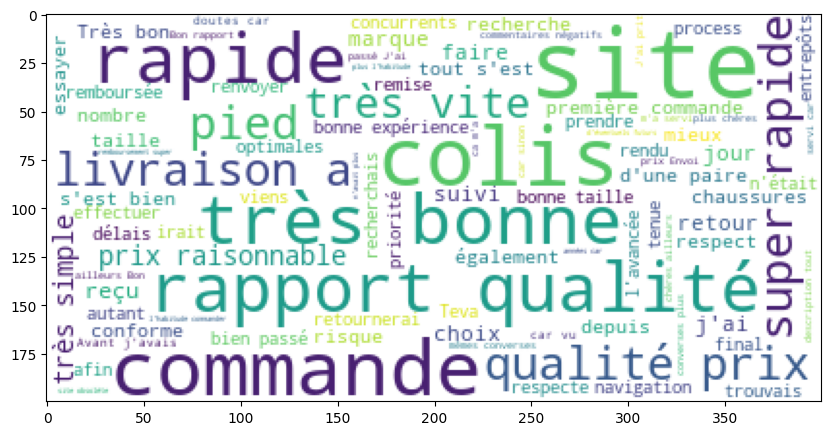

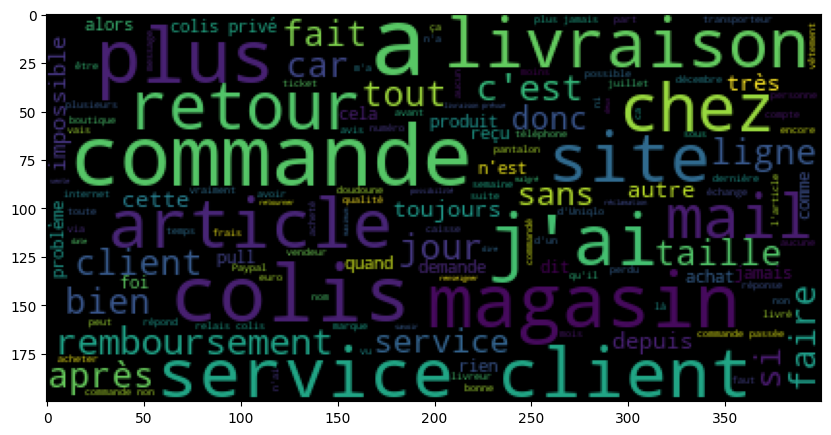

In [79]:
# Transformer les commentaires du df_vetements en chaine de caractère de type string
text_pos = ""
for e in df_vetements_pos.commentaire : text_pos += e
text_neg = ""
for e in df_vetements_neg.commentaire : text_neg += e

# Tracer le nuage de mots
plot_word_cloud(text_pos, "white")
plot_word_cloud(text_neg, "black")


{'eus', 'ne', 'étées', 'étante', 'fusses', 'tes', 'ses', 'eussent', 'êtes', 'mais', 'votre', 'fusse', 'm', 'eues', 'la', 'il', 'eusse', 'étés', 'un', 'aviez', 'toi', 'se', 'au', 'aux', 'nous', 'à', 'aurait', 'soient', 'dans', 'été', 'ait', 'c', 'eue', 'eurent', 'Vinted', 'sont', 'suis', 'étantes', 'moi', 'auriez', 'serait', 'te', 'même', 'que', 'ayante', 'qu', 'ont', 'les', 'étais', 'auront', 'de', 'avec', 'ou', 'aie', 'tu', 'ayant', 'leur', 'par', 'en', 'et', 'me', 'serions', 'La Boutique Officielle', 'avez', 'eusses', 'fussiez', 'notre', 'ta', 'n', 'serais', 'étant', 'seraient', 'avaient', 's', 'eût', 'avait', 'seriez', 'fus', 'aura', 'ton', 'aurions', 'le', 'aies', 'vos', 'seras', 't', 'avais', 'étants', 'eu', 'ai', 'eut', 'nos', 'sera', 'serai', 'l', 'ces', 'aurais', 'es', 'sois', 'sur', 'serez', 'avons', 'des', 'y', 'lui', 'ma', 'auras', 'une', 'furent', 'aurons', 'fussent', 'seront', 'aurai', 'aurez', 'du', 'soyons', 'vous', 'pas', 'étiez', 'soyez', 'mon', 'ayants', 'elle', 'ayon

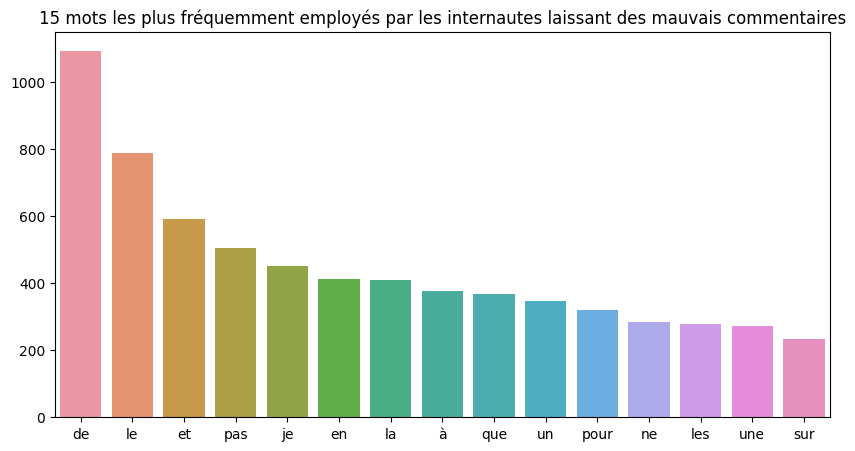

In [83]:
from collections import Counter
import seaborn as sns 

chaine = ' '.join(i.lower() for i in df_vetements_neg.commentaire if i.lower() not in stop_words)
dico = Counter(chaine.split())

mots = [m[0] for m in dico.most_common(15)]
freq = [m[1] for m in dico.most_common(15)]

plt.figure(figsize= (10,5))
sns.barplot(x=mots, y=freq)
plt.title('15 mots les plus fréquemment employés par les internautes laissant des mauvais commentaires')

print(stop_words)

In [74]:
# On définit une fonction qui va traiter les commentaires

nltk.download('punkt')
nltk.download('stopwords')

def analyse_commentaire(commentaire):
    commentaire = commentaire.lower() #On les met en minuscule
    mots = word_tokenize(commentaire) #On crée des tokens composés de mots
    mots_stopwords = [mot for mot in mots if mot not in stop_words]
    return mots_stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
df_vetements['commentaire'] = df_vetements['commentaire'].apply(analyse_commentaire)

In [76]:
tous_mots = [mot for liste_mots in df_vetements['commentaire'] for mot in liste_mots]

compteur_mots = Counter(tous_mots)

mots_plus_freq = compteur_mots.most_common(10)

df_resultats = pd.DataFrame(mots_plus_freq, columns=['Mot', 'Occurrence'])

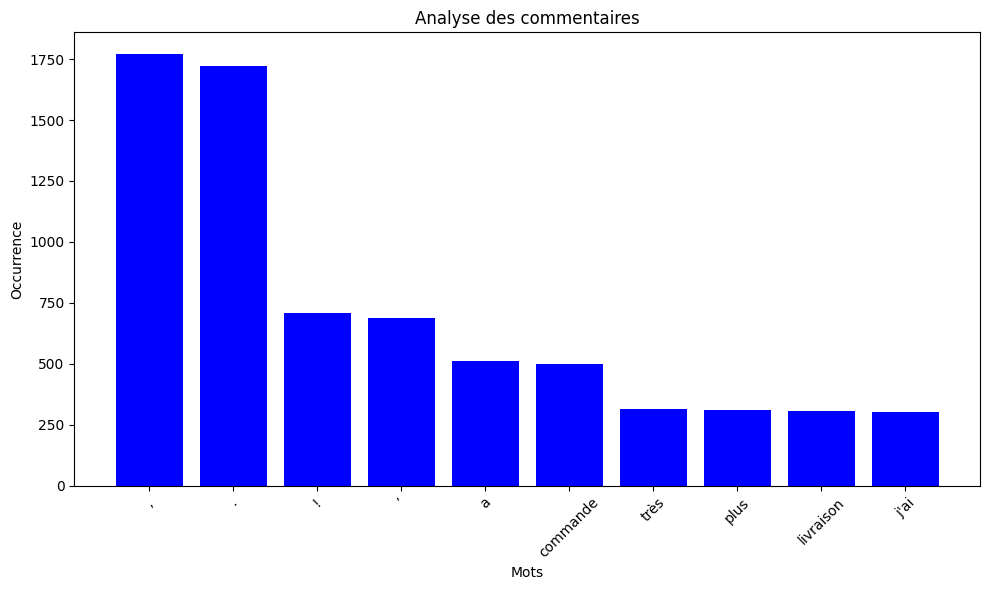

In [77]:
# On visualise les mots les plus fréquents dans les commentaires

plt.figure(figsize=(10, 6))
plt.bar(df_resultats['Mot'], df_resultats['Occurrence'], color='blue')
plt.xlabel('Mots')
plt.ylabel('Occurrence')
plt.title('Analyse des commentaires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# répartition des catégories de commentaires par entreprises (text mining)

In [ ]:
# évolution du nombre de réponse faites au client par entreprises, par an (à lire avec évolution de la moyenne)
# voir dans quel secteur le plus de retour client est fait car trop peu de valeurs dans ce dataset

In [ ]:
# moyenne d'étoiles des clients en fonction de l'entreprises qui répondent ou pas - idem ci dessus

### 1.3 Exploitation des données